# Chapter 19:
    Handwritten Digit Recognition

Using the popular handwritten digits dataset http://yann.lecun.com/exdb/mnist/

We'll Learn:

How to load the MNIST dataset in Keras and develop a baseline neural network model for the problem.

How to implement and evaluate a simple Convolutional Neural Network for MNIST.

How to implement a close to state-of-the-art deep learning model for MNIST.

In [1]:
# Load modules
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [13]:
train, test = mnist.load_data()
len(train), len(test)

(2, 2)

In [14]:
train

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [18]:
# Load (download if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

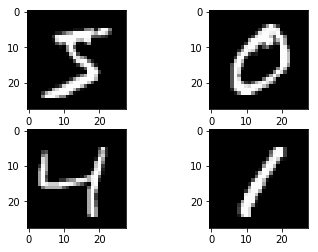

In [19]:
# Plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# Show the plot
plt.show()

#### Build a baseline model for the classification of the dataset

In [4]:
# import modules
import numpy as np
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [5]:
# Data is already loaded. See cells above for loading the MNIST data

In [6]:
# Check the shape of images
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [23]:
X_train.shape[1] * X_train.shape[2]

784

In [24]:
# Flatten 28 * 28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
# Reshape the input images
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [35]:
max(X_train[5])

255.0

In [36]:
# Normalize inputs from 0 - 255 to 0 - 1
X_train = X_train / 255
X_test = X_test / 255

In [37]:
# One-hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [38]:
num_classes

10

In [39]:
# Define baseline MLP model
def baseline():
    # Create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [40]:
var = baseline()
var.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [41]:
# build the model
model = baseline()
# fit the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose = 0)
print('Baseline Error: %.2f%%' %(100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.2716 - accuracy: 0.9228 - val_loss: 0.1396 - val_accuracy: 0.9596
Epoch 2/10
 - 3s - loss: 0.1100 - accuracy: 0.9681 - val_loss: 0.0964 - val_accuracy: 0.9701
Epoch 3/10
 - 3s - loss: 0.0698 - accuracy: 0.9800 - val_loss: 0.0733 - val_accuracy: 0.9769
Epoch 4/10
 - 3s - loss: 0.0490 - accuracy: 0.9861 - val_loss: 0.0695 - val_accuracy: 0.9790
Epoch 5/10
 - 3s - loss: 0.0357 - accuracy: 0.9899 - val_loss: 0.0663 - val_accuracy: 0.9792
Epoch 6/10
 - 3s - loss: 0.0261 - accuracy: 0.9931 - val_loss: 0.0672 - val_accuracy: 0.9785
Epoch 7/10
 - 3s - loss: 0.0197 - accuracy: 0.9953 - val_loss: 0.0601 - val_accuracy: 0.9808
Epoch 8/10
 - 3s - loss: 0.0150 - accuracy: 0.9965 - val_loss: 0.0594 - val_accuracy: 0.9807
Epoch 9/10
 - 3s - loss: 0.0102 - accuracy: 0.9981 - val_loss: 0.0637 - val_accuracy: 0.9799
Epoch 10/10
 - 3s - loss: 0.0074 - accuracy: 0.9986 - val_loss: 0.0602 - val_accuracy: 0.9807
Baseline Error: 1.9

### Simple ConvNet for MNIST

In [42]:
# Import modules for convolutions
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D

In [49]:
# Fix random seed for reproducibility
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [50]:
# Reshape data to (Samples, channels, width, height) 
# for tensorflow, this should be  (samples, height, width, channels)
# for theano, this should be (samples, channels, height, width)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')
X_test.shape, X_train.shape

((10000, 28, 28, 1), (60000, 28, 28, 1))

In [ ]:
# Import modules to fix data format
from keras import backend as K
#K.set_image_dim_ordering('th')

# set image dimensions
img_cols,img_rows = X_train.shape[1], X_train.shape[2]
# If statement to fix data format
def dim_check():
    if K.image_data_format=='channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1,img_cols,img_rows)
        x_test = x_test.reshape(x_test.shape[0], 1,img_cols,img_rows)
        input_shape = (1,img_cols,img_rows)
    else:
        x_train = x_train.reshape(x_train.shape[0],img_cols,img_rows,1)
        x_test = x_test.reshape(x_test.shape[0],img_cols,img_rows,1)
        input_shape = (img_cols,img_rows,1)
    return


In [51]:
# Normalize inputs from 0 - 255 to 0 - 1
X_train = X_train/255
X_test = X_test/255

In [52]:
# One-hot encode the outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [55]:
def baseline_conv():
    model = Sequential()
    # (samples, height, width, channels)
    model.add(Convolution2D(32, (5, 5), input_shape=(28, 28, 1), activation = 'relu', border_mode = 'valid'))
    model.add(MaxPooling2D(pool_size=(2, 2))) # maxpool of 2 x 2
    model.add(Dropout(0.2)) # Dropout of 20%
    model.add(Flatten()) # Flatten all conv ops
    model.add(Dense(128, activation='relu')) # Dense connection of flattened conv operation
    model.add(Dense(num_classes, activation= 'softmax'))
    # Compile model
    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy']) # Compile model
    return model

In [56]:
# Build the model
model = baseline_conv()
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10, batch_size=200, verbose = 2)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), input_shape=(28, 28, 1..., activation="relu", padding="valid")`
  after removing the cwd from sys.path.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 13s - loss: 0.2441 - accuracy: 0.9305 - val_loss: 0.0858 - val_accuracy: 0.9730
Epoch 2/10
 - 14s - loss: 0.0745 - accuracy: 0.9781 - val_loss: 0.0498 - val_accuracy: 0.9841
Epoch 3/10
 - 13s - loss: 0.0519 - accuracy: 0.9849 - val_loss: 0.0437 - val_accuracy: 0.9849
Epoch 4/10
 - 13s - loss: 0.0402 - accuracy: 0.9882 - val_loss: 0.0370 - val_accuracy: 0.9877
Epoch 5/10
 - 13s - loss: 0.0338 - accuracy: 0.9895 - val_loss: 0.0419 - val_accuracy: 0.9863
Epoch 6/10
 - 13s - loss: 0.0273 - accuracy: 0.9913 - val_loss: 0.0392 - val_accuracy: 0.9872
Epoch 7/10
 - 13s - loss: 0.0234 - accuracy: 0.9924 - val_loss: 0.0386 - val_accuracy: 0.9874
Epoch 8/10
 - 13s - loss: 0.0207 - accuracy: 0.9931 - val_loss: 0.0316 - val_accuracy: 0.9901
Epoch 9/10
 - 13s - loss: 0.0172 - accuracy: 0.9947 - val_loss: 0.0338 - val_accuracy: 0.9897
Epoch 10/10
 - 13s - loss: 0.0133 - accuracy: 0.9959 - val_loss: 0.0353 - val_accuracy: 0.9890


In [57]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('CNN Error: %.2f%%' % (100-scores[1]*100))

CNN Error: 1.10%


In [58]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
________________________________________________

### Larger ConvNet for MNIST

In [135]:
# Import modules
# Import the backend and change the image ordering to either tensorflow or theano. This should affect how the 
# image is ordered
from keras import backend as K
#K.set_image_dim_format('channel_first')
K.set_image_data_format('channels_last')

In [59]:
# Fix random seed
# Load data
# Reshape data based on 'tf' or 'th' ordering
# Normalize inputs from 0 - 255 to 0 - 1
# One-hot encode outputs
# Define the larger model
def baseline_conv_larger():
    # Create model
    model = Sequential()
    model.add(Convolution2D(30, (5,5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(15, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    return model

In [60]:
# build model
model = baseline_conv_larger()
# fit the model 
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 12s - loss: 0.3694 - accuracy: 0.8902 - val_loss: 0.0818 - val_accuracy: 0.9747
Epoch 2/10
 - 12s - loss: 0.1008 - accuracy: 0.9685 - val_loss: 0.0523 - val_accuracy: 0.9836
Epoch 3/10
 - 12s - loss: 0.0705 - accuracy: 0.9785 - val_loss: 0.0435 - val_accuracy: 0.9865
Epoch 4/10
 - 13s - loss: 0.0587 - accuracy: 0.9816 - val_loss: 0.0351 - val_accuracy: 0.9884
Epoch 5/10
 - 12s - loss: 0.0503 - accuracy: 0.9842 - val_loss: 0.0289 - val_accuracy: 0.9897
Epoch 6/10
 - 12s - loss: 0.0439 - accuracy: 0.9861 - val_loss: 0.0320 - val_accuracy: 0.9894
Epoch 7/10
 - 12s - loss: 0.0409 - accuracy: 0.9868 - val_loss: 0.0303 - val_accuracy: 0.9895
Epoch 8/10
 - 13s - loss: 0.0351 - accuracy: 0.9890 - val_loss: 0.0330 - val_accuracy: 0.9887
Epoch 9/10
 - 13s - loss: 0.0320 - accuracy: 0.9894 - val_loss: 0.0275 - val_accuracy: 0.9909
Epoch 10/10
 - 13s - loss: 0.0302 - accuracy: 0.9906 - val_loss: 0.0243 - val_accuracy: 0.9911


In [61]:
# final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose = 0)
print('Large CNN Error: %.2f%%' % (100-scores[1]*100))

Large CNN Error: 0.89%


In [62]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

# Chapter 20:
    Improve Model Performance with Image Augmentation

We'll learn:

About the image augmentation API provide by Keras and how to use it with your models.

How to perform feature standardization.

How to perform ZCA whitening of your images.

How to augment data with random rotations, shifts and flips of images.

How to save augmented image data to disk.

### Point of comparison for Image Augmentation

In [ ]:
# Plot of images as baseline for comparison
# Import modules
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [63]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

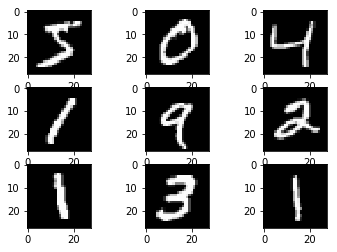

In [80]:
# Create a grid of 3x3 images
for i in range(0, 9):
    plt.subplot(330 +1+ i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# Show the plot
plt.show()

#### Feature Standardization

In [81]:
# Standardize image across the dataset, mean = 0, stdev = 1
# import imagedatagenerator for image augmentation
from keras.preprocessing.image import ImageDataGenerator

In [94]:
# Load data
# reshape data
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1], X_train.shape[2]).astype('float32')
X_test = X_test.reshape(X_test.shape[0],1, X_test.shape[1], X_test.shape[2]).astype('float32')
X_test.shape, X_train.shape

((10000, 1, 28, 28), (60000, 1, 28, 28))

In [95]:
# Define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

In [96]:
# Fit parameters from data
datagen.fit(X_train)

/home/michael/.local/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')


/home/michael/.local/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


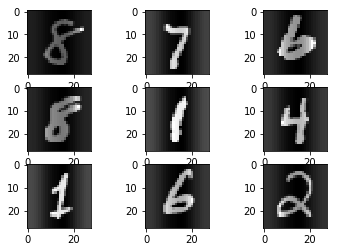

In [97]:
# Configure batch size and retrieve one bathc of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    #create a grid of 3 x 3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

#### ZCA Whitening

In [98]:
# Define data preparation
datagen = ImageDataGenerator(zca_whitening=True)

/home/michael/.local/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [99]:
# Fit parameters from data
datagen.fit(X_train)

/home/michael/.local/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')


/home/michael/.local/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


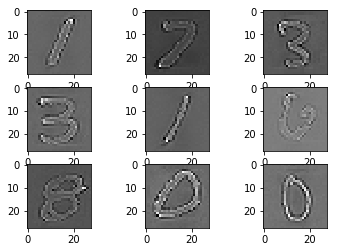

In [100]:
# Configure batch size and retrieve one bathc of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    #create a grid of 3 x 3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

#### Rotation Rotation

In [112]:
# Define data preparation
datagen = ImageDataGenerator(rotation_range=180)

In [113]:
# Fit parameters from data
datagen.fit(X_train)

/home/michael/.local/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')


/home/michael/.local/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


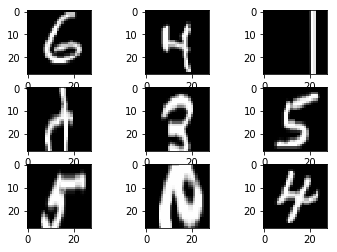

In [117]:
# Configure batch size and retrieve one bathc of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    #create a grid of 3 x 3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

#### Random Shifts

In [118]:
# Define data preparation
# Specify shift value
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)

In [119]:
# Fit parameters from data
datagen.fit(X_train)

/home/michael/.local/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')


/home/michael/.local/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


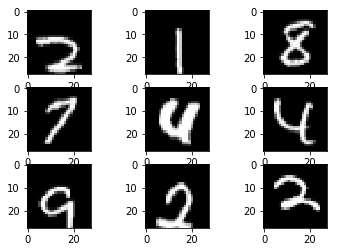

In [120]:
# Configure batch size and retrieve one bathc of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    #create a grid of 3 x 3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

#### Random Flips

In [121]:
# Define data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

In [122]:
# Fit parameters from data
datagen.fit(X_train)

/home/michael/.local/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')


/home/michael/.local/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


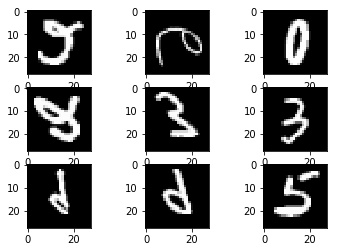

In [123]:
# Configure batch size and retrieve one bathc of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    #create a grid of 3 x 3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

#### Saving augmented files for use

In [136]:
X_train.shape

(60000, 1, 28, 28)

In [137]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[3], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[3], X_test.shape[1])
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [124]:
# Import os for making changes to directories
import os

In [138]:
# define data preparation
datagen = ImageDataGenerator()
# fit the parameters from data
datagen.fit(X_train)

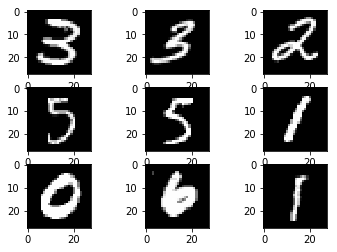

In [141]:
# Configure batch size and retrieve one batch of images
#os.makedirs('Images_MNIST')
# for loop
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size= 9, save_to_dir='Images_MNIST', save_prefix='aug', save_format='png'):
    # Create a grid of 3 x 3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 +i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap = plt.get_cmap('gray'))
        
    # Show the plot
    plt.show()
    break

In [143]:
a = {
                "Cred_turnover": 34,
                "DTI_average": 0.3,
                "Deb_turnover": 0,
                "Income_class": "G",
                "Income_free": 11.41,
                "Income_nxt_3_mnths": 0.0,
                "Income_other": "Yes",
                "Income_other_avg": 11.64,
                "Income_other_no_mnths": 3,
                "Income_payments": 0,
                "Income_regular": 0,
                "Income_stable": "Income Not Stable",
                "Income_trend": 0,
                "Mnths_with_loan": 0,
                "Monthly_avg_income": 0.0,
                "Monthly_med_income": 0.0,
                "Rep_last_mnth": "No",
                "Salary_day": 31,
                "Statement_period": "September - November",
                "Tenor": 3,
                "Tot_salary_earned": 0.0
}

In [171]:
a = {'0':{
    "Avg_loan_reps": 117975.1033333333,
    "Cred_turnover": 2344354,
    "DTI_average": 6.9645288988,
    "Deb_turnover": 2329904,
    "Income_class": "D",
    "Income_free": 4816.7666666666,
    "Income_nxt_3_mnths": 50818.27,
    "Income_other": "Yes",
    "Income_other_avg": 764512.0866666666,
    "Income_other_no_mnths": 2,
    "Income_payments": 1,
    "Income_regular": 0,
    "Income_stable": "No",
    "Income_trend": 1,
    "Mnths_with_loan": 1,
    "Monthly_avg_income": 16939.4233333333,
    "Monthly_med_income": 0.0,
    "Rep_last_mnth": "Yes",
    "Salary_day": 23,
    "Statement_period": "January - March",
    "Tenor": 3,
    "Tot_salary_earned": 50818.27
}}

In [172]:
a['0']['Risk_level'] = risk_lev(a)
a['0']

{'Avg_loan_reps': 117975.1033333333,
 'Cred_turnover': 2344354,
 'DTI_average': 6.9645288988,
 'Deb_turnover': 2329904,
 'Income_class': 'D',
 'Income_free': 4816.7666666666,
 'Income_nxt_3_mnths': 50818.27,
 'Income_other': 'Yes',
 'Income_other_avg': 764512.0866666666,
 'Income_other_no_mnths': 2,
 'Income_payments': 1,
 'Income_regular': 0,
 'Income_stable': 'No',
 'Income_trend': 1,
 'Mnths_with_loan': 1,
 'Monthly_avg_income': 16939.4233333333,
 'Monthly_med_income': 0.0,
 'Rep_last_mnth': 'Yes',
 'Salary_day': 23,
 'Statement_period': 'January - March',
 'Tenor': 3,
 'Tot_salary_earned': 50818.27,
 'Risk_level': None}

In [181]:
a['0']['Rep_last_mnth'] == any(['Yes', 'No'])

False

In [178]:
import numpy as np

In [147]:
import pandas as pd

In [159]:
dev = pd.DataFrame.from_dict(a)

In [161]:
dev

,0
Cred_turnover,34
DTI_average,0.3
Deb_turnover,0
Income_class,G
Income_free,11.41
Income_nxt_3_mnths,0
Income_other,Yes
Income_other_avg,11.64
Income_other_no_mnths,3
Income_payments,0


In [ ]:
Very High Risk	Loan repayment in last month	Yes
	Count of months with loan identified	=3
	Income trend	-1
	Income payment	<3
            Average loan repayments	>= Salary  # checka
	Income stability	No
	Income regularity	0
	Income class	G
    
Loan repayment in last month	Yes
Count of months with loan identified	2
Income trend	0
Income payment	1
        Average loan repayments	>= Salary
Income stability	No
Income regularity	0.33
Income Class	F

Loan repayment in last month	No
Count of months with loan identified	2
Income trend	1
Income payment	2
Average loan repayments	< Salary
Income stability	Yes
Income regularity	0.67 or 0.33
Income Class	E, D, C


Loan repayment in last month	No or Yes
Count of months with loan identified	1
Income trend	0
Income payment	2
Average loan repayments	< Salary
Income stability	Yes
Income regularity	0.67
Income Class	D, C, B or A

Loan repayment in last month	No
Count of months with loan identified	0
Income trend	1
Income payment	3
        Average loan repayments	< Salary
Income stability	Yes
Income regularity	1
Income class	D, C, B or A

In [166]:

def risk_lev(a):
    if a['0']['Rep_last_mnth'] == 'Yes' and a['0']['Mnths_with_loan'] == 3 and a['0']['Income_trend'] == -1 and a['0']['Income_payments'] < 3 and a['0']['Avg_loan_reps'] >= a['0']['Monthly_avg_income'] and a['Income_stable'] == 'No' and a['0']['Income_regular'] == 0 and a['0']['Income_class'] == 'G':
        return 'VH'
    elif a['0']['Rep_last_mnth'] == 'Yes' and a['0']['Mnths_with_loan'] >= 2 and a['0']['Income_trend'] <= 0 and a['0']['Income_payments'] == 1 and a['0']['Avg_loan_reps'] >= a['0']['Monthly_avg_income'] and a['Income_stable'] == 'No' and a['0']['Income_regular'] == 0.33 and a['0']['Income_class'] == 'F':
        return 'H'
    elif a['0']['Rep_last_mnth'] == 'No' and a['0']['Mnths_with_loan'] == 2 and a['0']['Income_trend'] == 1 and a['0']['Income_payments'] == 2 and a['0']['Avg_loan_reps'] < a['0']['Monthly_avg_income'] and a['Income_stable'] == 'Yes' and a['0']['Income_regular'] >= 0.33 and (a['0']['Income_class'] == 'E' or a['0']['Income_class'] == 'D' or a['0']['Income_class'] == 'C'):
        return 'M'
    elif (a['0']['Rep_last_mnth'] == 'Yes' or a['0']['Rep_last_mnth'] == 'No')  and a['0']['Mnths_with_loan'] <= 1 and a['0']['Income_trend'] == 0 and a['0']['Income_payments'] == 2 and a['0']['Avg_loan_reps'] < a['Monthly_avg_income'] and a['0']['Income_stable'] == 'Yes' and a['0']['Income_regular'] >= 0.67 and (a['0']['Income_class'] == 'D' or a['0']['Income_class'] == 'C' or a['0']['Income_class'] == 'B' or a['0']['Income_class'] == 'A'):
        return 'L'
    elif a['0']['Rep_last_mnth'] == 'No' and a['0']['Mnths_with_loan'] == 0 and a['0']['Income_trend'] == 1 and a['0']['Income_payments'] == 3 and a['0']['Avg_loan_reps'] < a['0']['Monthly_avg_income'] and a['Income_stable'] == 'Yes' and a['0']['Income_regular'] == 1 and (a['0']['Income_class'] == 'D' or a['0']['Income_class']== 'C' or a['0']['Income_class'] == 'A'):
        return 'VL'
    else:
        return 'M'
    

In [ ]:
a = ['Rep_last_mnth'] == 'Yes'

In [ ]:
1, 2, 3, 4        1, 2, 3
1, 2, 3, 4    x   1 ,2 ,3
1, 2, 3, 4        1, 2, 3
1, 2, 3, 4

In [ ]:
1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3
0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2 3
0, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3
.                                            x 
.
.
.